# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


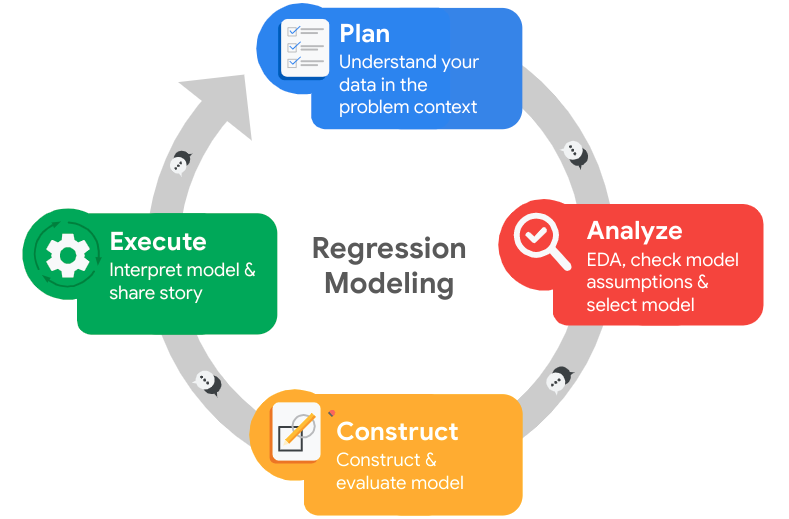

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




### Answers:
* The stakeholders are the HR department at Salifort Motors
* I'm trying to build a model that predicts whether or not an employee will leave the company in order to gain actionable insights to improve employee satisfaction levels.
* The variable `left` is the target variable for the model, while others are possible independent variabls and should be further investigated.
* The HR dataset containing 15,000 rows and 10 columns, which can be found on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).
* We must make sure out data contains no bias in any specific type of employees to prevent the HR deparment from making wrong decisions in treating employees.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor, plot_importance

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,\
roc_curve, roc_auc_score

# Others
from sklearn.tree import plot_tree
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


It is unlikely that different employees self-reported the exact same response for every column (especially across 10 columns). Therefore, we can proceed by dropping these duplicates.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

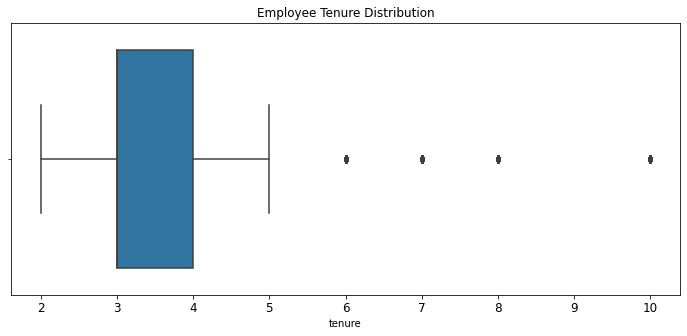

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(12,5))
plt.title('Employee Tenure Distribution', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'], fliersize=5)
plt.show()

The boxplot above shows that there are outliers in the `tenure` variable.

It would be helpful to investigate how many rows in the data contain outliers in the `tenure` column.

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
# Calculate the lower quartile, upper quartile, and the interquartile range
q1 = df1['tenure'].quantile(0.25)
q3 = df1['tenure'].quantile(0.75)
iqr = q3 - q1

# Calculate the lower limit and upper limit to identify outliers
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Extract outliers and count the number
outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




### Answer:
* There are 14,999 entries with 10 columns in the dataset. The 10 variables (columns) are composed of 2 `float64`, 6 `int64`, and 2 `object` datatypes.
* We observed some duplicated rows which was unlikely to happen. Besides, we noticed the presence of outliers in `tenure` variable.
* We renamed some columns for consistency and spelling mistakes. Besides, `time_spend_company` was renamed as `tenure` for the sake of conciseness.
* Some purposes of EDA are:
    * Understand data before making any hypothesis
    * Eliminate data bias
    * Ensure data quality
* Practice notebooks throughout this certificate course.
* Since employees with `tenure` larger than 5.5 years are considered outliers, we might overlook those loyal employees if we exclude outliers.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print('')

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

First, we plot a correlation heatmap to check the multi-collinearity between features.

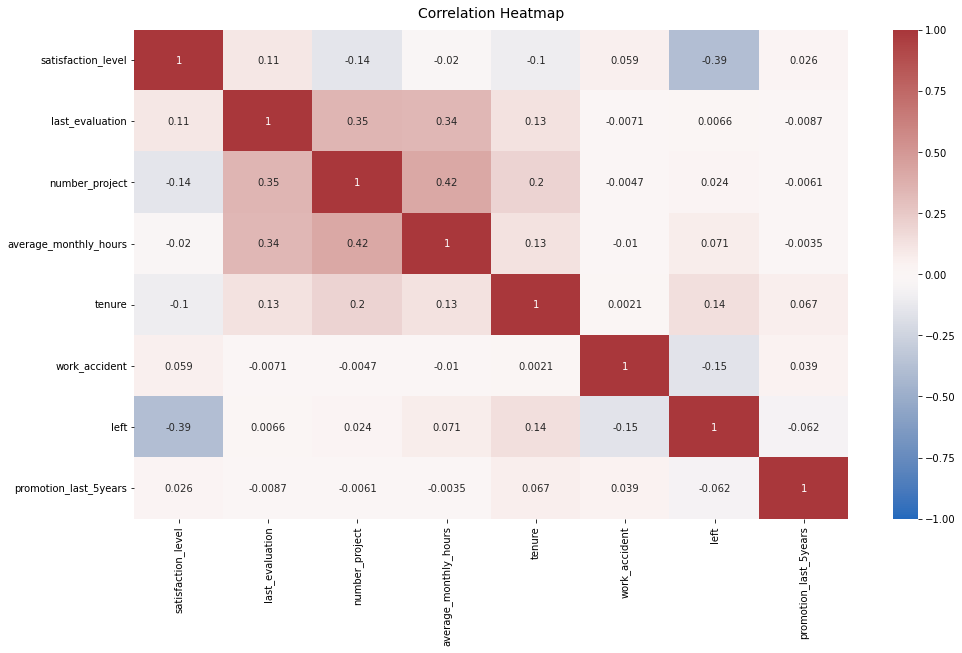

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

From the heatmap, `last_evaluation`, `number_project`, and `average_monthly_hours` seem to have some positive correlation with each other. This makes sense since employees who are assigned more projects tend to work longer hours and have higher evaluation scores. On the other hand, `left` is negatively correlated with `satisfaction_level`. This also makes sense since employees with low satisfaction level tend to leave the company.

Next, we investigate the three variables with some positive correlation: `last_evaluation`, `number_project`, and `average_monthly_hours`.

We first compare `number_project` and `average_monthly_hours`. Note that the two variables have slightly negative correlation with `left`, which we will also include in the plots.

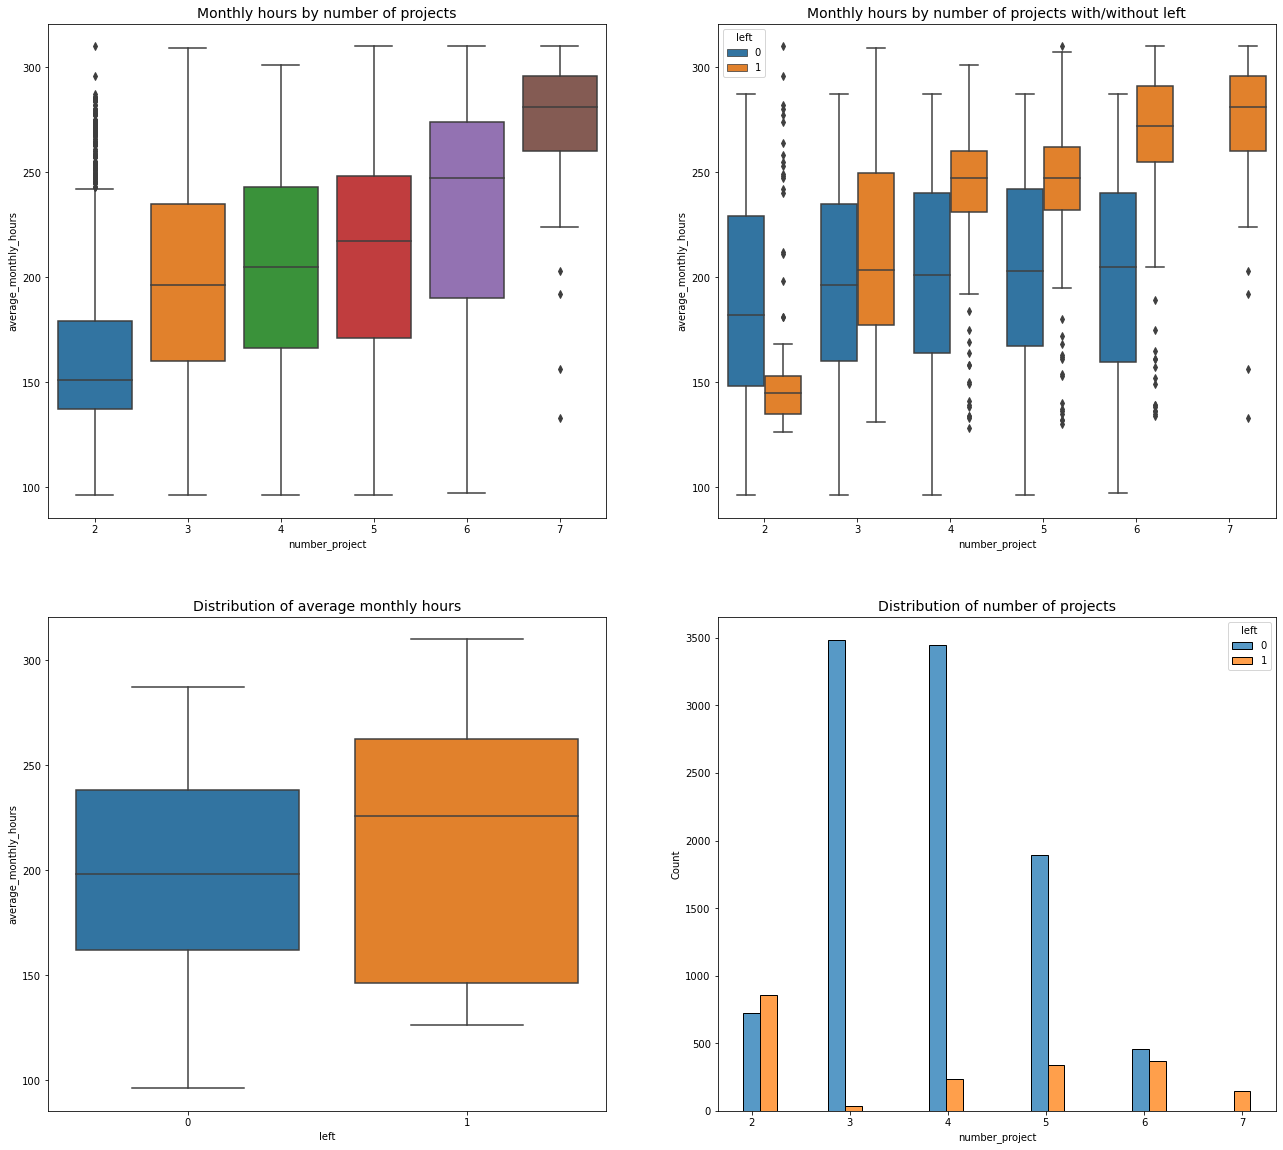

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(2, 2, figsize=(22,20))

# Create boxplot of `average_monthly_hours` distribution by `number_project`
sns.boxplot(data=df1, x='number_project', y='average_monthly_hours', orient='v', ax=ax[0][0])
ax[0][0].set_title('Monthly hours by number of projects', fontsize='14')
# Create boxplot of `average_monthly_hours` distribution by `number_project` and by `left`
sns.boxplot(data=df1, x='number_project', y='average_monthly_hours', hue='left', orient='v', ax=ax[0][1])
ax[0][1].set_title('Monthly hours by number of projects with/without left', fontsize='14')

# Create boxplot of `average_monthly_hours` distribution by `left`
sns.boxplot(data=df1, x='left', y='average_monthly_hours', orient = 'v', ax=ax[1][0])
ax[1][0].set_title('Distribution of average monthly hours', fontsize='14')
# Create histogram of `number_project` distribution by `left`
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1][1])
ax[1][1].set_title('Distribution of number of projects', fontsize='14')

# Display the plots
plt.show()

* The upper left graph shows monthly hours by number of projects. We can clearly observe that the box moves upwards as the number of projects increases. This indicates the positive correlation between `number_project` and `average_monthly_hours`. 
* The upper right graph shows the same distribution but now in stayed/resigned groups. We can observe the box of resigned employees moves more than that of stayed ones. Moreover, everyone with seven projects left the company, and the interquartile range of this group was also much more than any other group. This implies high number of projects and the high working hours can be the reasons for leaving.
* The lower left graph shows distribution of average monthly hours in stayed/resigned groups. The higher maximum, median, minimum also supports the finding that high working hours led to employee turnover.
* The lower right graph shows distribution of number of projects in stayed/resigned groups. There are two main groups of resigned employees: (A) those who worked on less projects, and (B) those who worked much more projects. Of those in group A, it's possible that they were about to resign or be fired. For those in group B, it supports the finding that high number of projects led to employee turnover.
* The optimal number of projects for employees to work on seems to be 3–4, and the optimal monthly hour range seems to be 150-250 hours. Moreover, if you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`, which is lower than the median of two groups (stayed/resigned). It seems that employees here tend to be overworked.

Let's confirm that all employees with seven projects left.

In [16]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

The count result only shows one category `left = 1 (True)`, so this confirms that all employees with 7 projects did leave.

Next, we compare `average_monthly_hours` and `last_evaluation`.

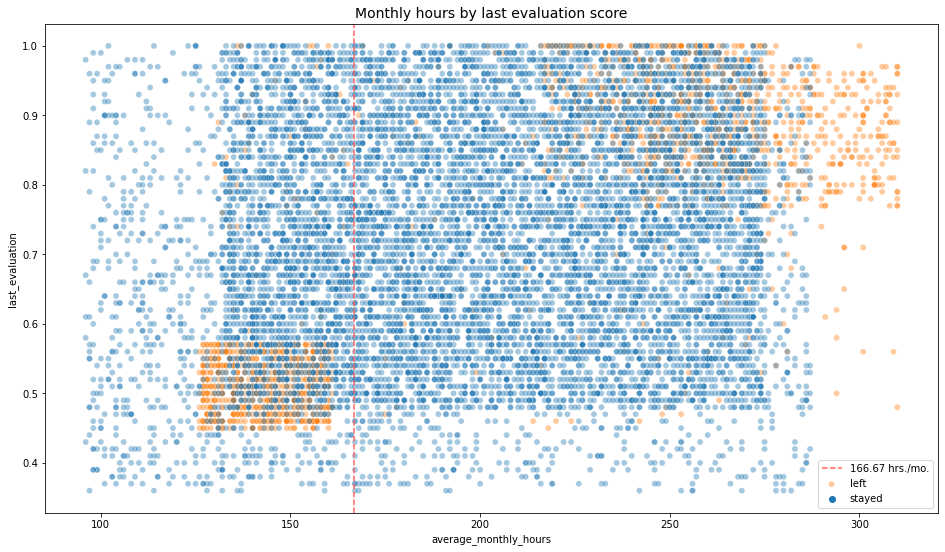

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

We can observe that:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Some observations here correspond to the findings in the previous section.

Next, we compare `number_project` and `last_evaluation`.

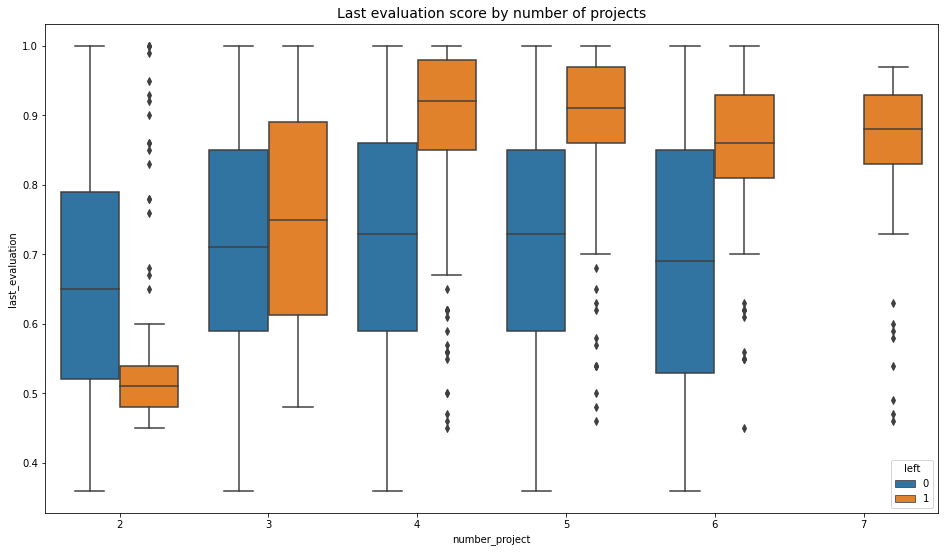

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.boxplot(data=df1, x='number_project', y='last_evaluation', hue='left')
plt.title('Last evaluation score by number of projects', fontsize='14');

We can observe that:
- The resulting graph is similar to the boxplot of monthly hours by number of projects.
- Employees with more projects tended to have higher last evaluation scores.

Therefore, based on the observations so far, we can confirm the positive correlation among `last_evaluation`, `number_project`, and `average_monthly_hours`.

Now we compare `left` and `satisfaction_level`. It might be also interesting to include `tenure` for further comparison.

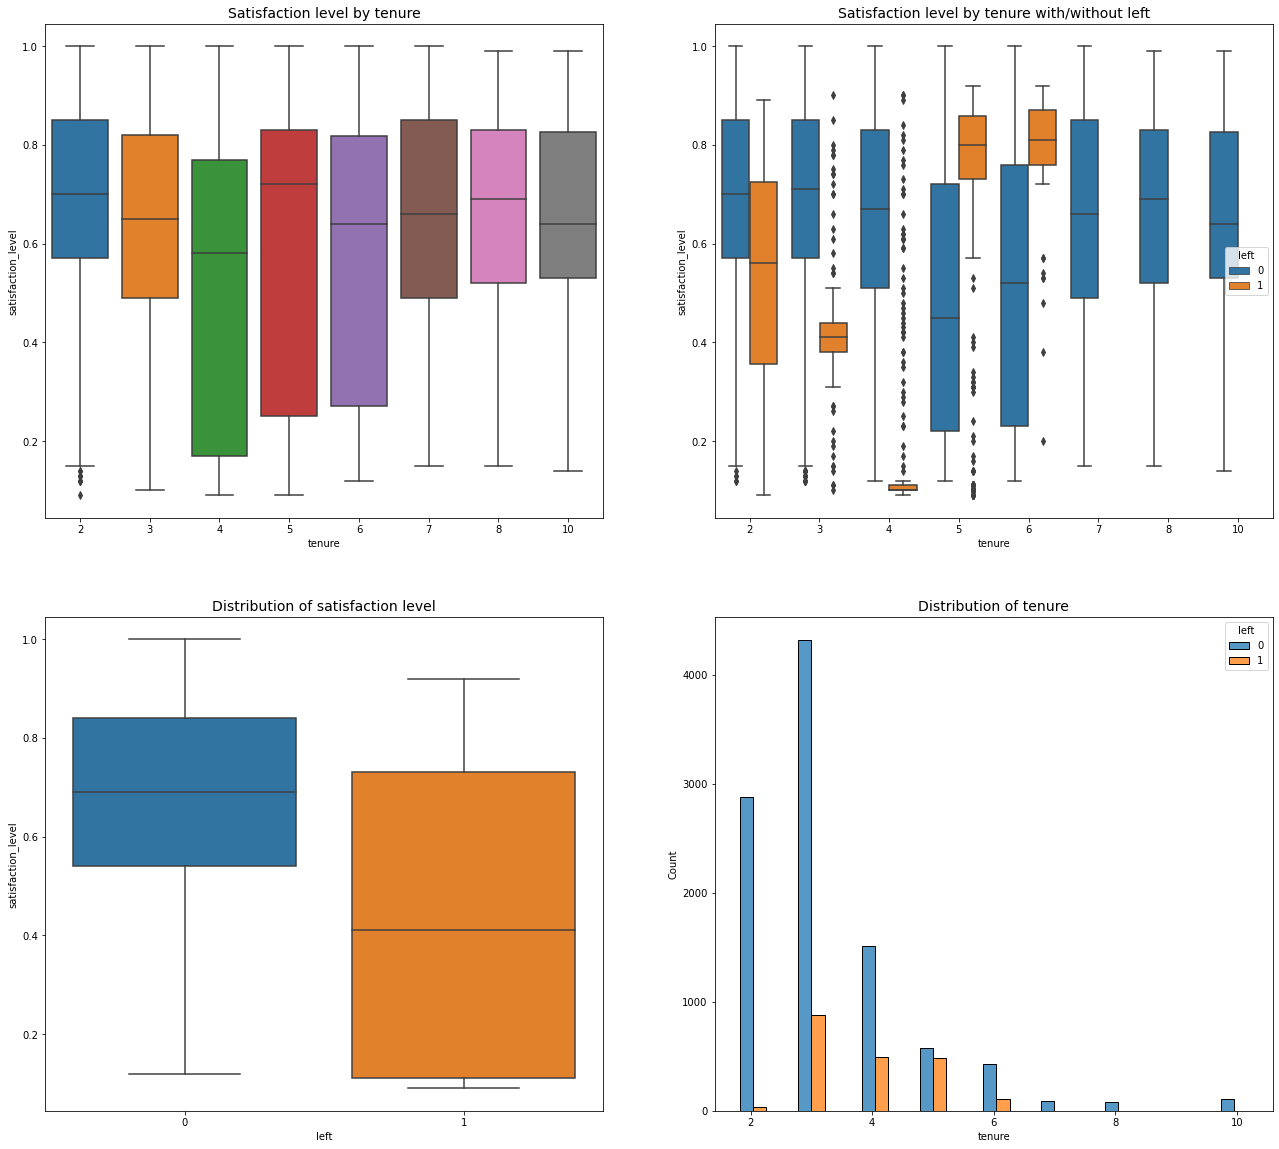

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(2, 2, figsize=(22,20))

# Create boxplot of `satisfaction_level` distribution by `tenure`
sns.boxplot(data=df1, x='tenure', y='satisfaction_level', orient='v', ax=ax[0][0])
ax[0][0].set_title('Satisfaction level by tenure', fontsize='14')
# Create boxplot of `satisfaction_level` distribution by `tenure` and by `left`
sns.boxplot(data=df1, x='tenure', y='satisfaction_level', hue='left', orient='v', ax=ax[0][1])
ax[0][1].set_title('Satisfaction level by tenure with/without left', fontsize='14')

# Create boxplot of `satisfaction_level` distribution by `left`
sns.boxplot(data=df1, x='left', y='satisfaction_level', orient = 'v', ax=ax[1][0])
ax[1][0].set_title('Distribution of satisfaction level', fontsize='14')
# Create histogram of `tenure` distribution by `left`
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1][1])
ax[1][1].set_title('Distribution of tenure', fontsize='14')

# Display the plots
plt.show()

We can observe that:
- Resigned employees tended to have lower satisfaction scores (lower left graph) and shorter tenures (lower right graph).
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
- Five-year and six-year employees who left seem to have higher satisfaction levels among employees with same tenure. It's unusual for satisfied employees to leave the company, so it's worth investigating the reason in order to make informed decisions to increase retention. 
- The longest-tenured (tenure above 7) employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. However, those employees were also relatively few. It's possible that they're the higher-ranking, higher-paid employees.

We can also calculate the mean and median satisfaction scores between stayed/resigned groups.

In [20]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. 

Now we compare `salary` and `tenure`.

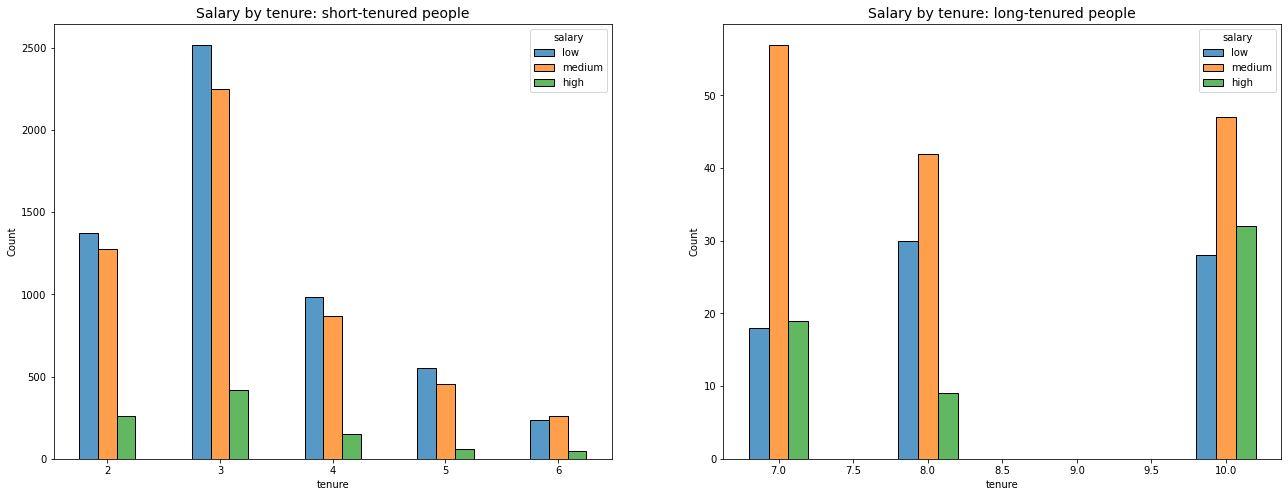

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

Next, we compare `promotion_last_5years` and `average_monthly_hours`

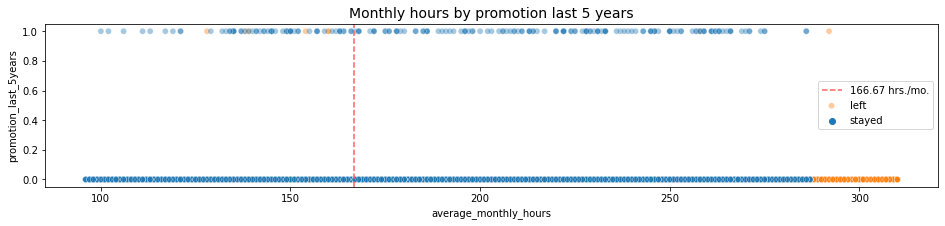

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- Very few employees who were promoted in the last five years left.
- Very few employees who worked the most hours were promoted.
- Many resigned employees were working the longest hours without promotion, while some employees resigned even though they got promoted. It makes sense for the former observation since no employee is willing to work harder without a reward. However, the latter observation seems to be unusual. Hence, it's worth investigating why employees left even with promotion.

Next, we inspect how the resigned employees are distributed across departments.

In [23]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

The three departments with the most employees are sales, technical, and support.

Last but not least, we investigate the stayed/resigned groups among `department`.

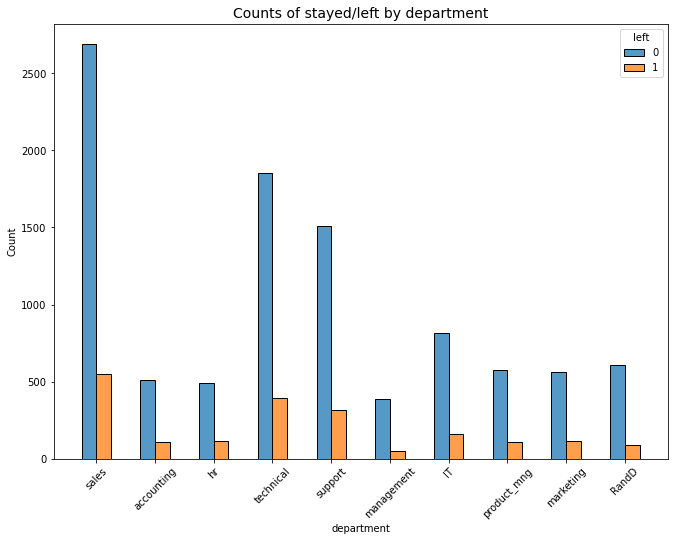

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create histogram to compare employee distribution by deparment in stayed/left groups
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

Despite the general trend, we also found that five-year and six-year employees who left seemed to have higher satisfaction levels among employees with same tenure. It's unusual for satisfied employees to leave the company, so it's worth investigating the reason in order to make informed decisions to increase retention. Besides, some employees resigned even though they got promoted. It's worth investigating why employees left even with promotion.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- Five-year and six-year employees who left seemed to have higher satisfaction levels among employees with same tenure. It's unusual for satisfied employees to leave the company. Besides, some employees resigned even though they got promoted.
- We chose all variables except the target variable `left` since logically they all can have impact on whether an employee will leave. However, alternatively, to make a robust, predictive model, we could exclude variables with very little correlation to the target variable `left` since they contribute very few predictive power over the outcome.
- There are outliers in the variable `tenure`, which may influence the model performance.
- Decision Tree and Random Forest models fit the data very well with precision, recall, F1, accuracy, and AUC scores above 90%. On the contrary, the logistic regression model has mediocre performance.
- We could build an improved model by further feature engineering such as dropping `satisfaction_level`. In this project, we just left this improvement for future outlook.
- Practice notebooks throughout this certificate course.
- Outliers in `tenure`, which are employees with tenure larger than 5.5 years, were dropped for logistic regression modeling. We might overlook those loyal employees.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We are trying to predict whether an employee leaves the company, which is a categorical outcome variable `left`. This involves binary classification, since the outcome variable can be either 1 (left) or 0 (stayed).

### Identify the types of models most appropriate for this task.

Logistic Regression model, or a Tree-based Machine Learning model could be a suitable model type.

### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

#### Feature Engineering
Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [25]:
### YOUR CODE HERE ###

# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

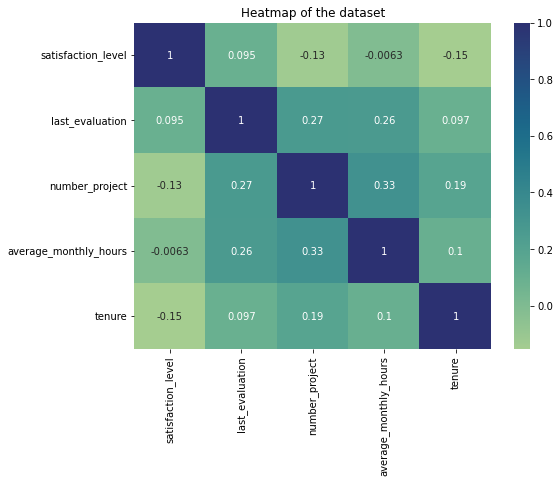

In [26]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

#### Outlier
In the earlier stage, we observed outliers in `tenure`. Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove them.

In [27]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


#### Split data
Establish the set of outcome variable `left` and the set of indenpendent variables, which are all other variables in the dataset.

In [28]:
# Isolate the outcome variable
y_lr = df_logreg['left']

# Display first few rows of the outcome variable
y_lr.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [29]:
# All features except the outcome variable will be used as training data
X_lr = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X_lr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Split the data into training set and testing set. Don't forget to stratify based on the values in y, since the classes are unbalanced.

In [30]:
# Split the data into training set and testing set
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.25, stratify=y_lr, random_state=42)

#### Build logistic regression model

In [31]:
%%time
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train_lr, y_train_lr)

CPU times: user 27.7 s, sys: 37.9 s, total: 1min 5s
Wall time: 32.7 s


Make predictions on the test set.

In [32]:
# Use the logistic regression model to get predictions on the test set
y_pred_lr = log_clf.predict(X_test_lr)

Create a confusion matrix to visualize the results of the logistic regression model.

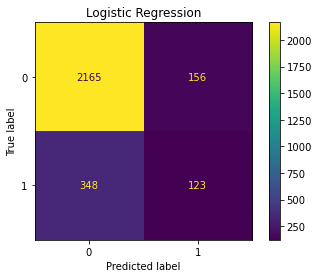

In [33]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_lr, y_pred_lr, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.title('Logistic Regression')
plt.show()

- True negatives (upper-left quadrant): The number of people who did not leave that the model accurately predicted did not leave.

- False positives (upper-right quadrant): The number of people who did not leave the model inaccurately predicted as leaving.

- False negatives (lower-left quadrant): The number of people who left that the model inaccurately predicted did not leave

- True positives (lower-right quadrant): The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives. In this case, the model predicts more false negatives and false positives than true positives, indicating a poor performance in predicting employees who will leave. We will evaluate model performance later.

Check the class balance in the data. In other words, check the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [34]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

#### Create classification report for logistic regression
Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [35]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test_lr, y_pred_lr, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The `classification_report` function gives an overview report for the model. It shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if we focus on model performance in predicting employees who will leave, then the scores are significantly lower. This report also corresponds to the observations in the confusion matrix.

Now we collect all metric scores of both taining and testing sets into new dataframe for later comparison between different models.

In [36]:
# Get predictions on the training set
y_pred_lr_train = log_clf.predict(X_train_lr)

# Compute precision
pc_lr_train = precision_score(y_train_lr, y_pred_lr_train)
pc_lr_test = precision_score(y_test_lr, y_pred_lr)

# Compute recall
rc_lr_train = recall_score(y_train_lr, y_pred_lr_train)
rc_lr_test = recall_score(y_test_lr, y_pred_lr)

# Get accuracy
ac_lr_train = accuracy_score(y_train_lr, y_pred_lr_train)
ac_lr_test = accuracy_score(y_test_lr, y_pred_lr)

# Compute F1 score
f1_lr_train = f1_score(y_train_lr, y_pred_lr_train)
f1_lr_test = f1_score(y_test_lr, y_pred_lr)

# Compute ROC AUC score
roc_auc_lr_train = roc_auc_score(y_train_lr, y_pred_lr_train)
roc_auc_lr_test = roc_auc_score(y_test_lr, y_pred_lr)

In [37]:
# Create dataframe with all metrics
results_lr = pd.DataFrame()
results_lr = pd.DataFrame([{'Model': 'Logistic Regression (train)',
                            'Precision': pc_lr_train,
                            'Recall': rc_lr_train,
                            'F1': f1_lr_train,
                            'Accuracy': ac_lr_train,
                            'AUC': roc_auc_lr_train
                          },
                           {'Model': 'Logistic Regression (test)',
                            'Precision': pc_lr_test,
                            'Recall': rc_lr_test,
                            'F1': f1_lr_test,
                            'Accuracy': ac_lr_test,
                            'AUC': roc_auc_lr_test
                           }])
results_lr

,Model,Precision,Recall,F1,Accuracy,AUC
0,Logistic Regression (train),0.461538,0.238129,0.314165,0.824836,0.590920
1,Logistic Regression (test),0.440860,0.261146,0.328000,0.819484,0.596967


Note that the logistic regression model has similar performance on both training and testing datasets.

### Modeling Approach B: Tree-based Model

This approach covers implementation of Decision Tree and Random Forest.

#### Feature Engineering

Since we have already created encoded dataset `df_enc` in the previous section, we can use it for the subsequent tasks.

#### Outlier

Note that tree-based models are generally robust to outliers, so we don't need to exclude the outliers. We can use dataset `df_enc` directly.

#### Split data

Establish the set of outcome variable `left` and the set of indenpendent variables, which are all other variables in the dataset.

In [38]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [39]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


Split the data into training set and testing set. Don't forget to stratify based on the values in y, since the classes are unbalanced.

In [40]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### B-1 Build Decision Tree

Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [41]:
# Instantiate model
decision_tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
dt_clf = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [42]:
%%time
dt_clf.fit(X_train, y_train)

CPU times: user 3.03 s, sys: 0 ns, total: 3.03 s
Wall time: 3.03 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

Identify the optimal values for the decision tree parameters.

In [43]:
# Check best parameters
dt_clf.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [44]:
# Check best AUC score on CV
dt_clf.best_score_

0.969819392792457

The AUC score is close to 1 (maximum), which shows that this model can predict employees who will leave very well.

Next, let's write a function that will help extract all the scores from the grid search.

In [45]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Return a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table_train = pd.DataFrame()
    table_train = pd.DataFrame({'Model': [model_name + ' (train)'],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'AUC': [auc]
                        })
  
    return table_train

Then let's define a function that gets all the scores from a model's predictions.

In [46]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table_test = pd.DataFrame({'Model': [model_name + ' (test)'],
                          'Precision': [precision], 
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table_test

Use the function just defined to get all the scores from grid search.

In [47]:
# Get all CV scores
results_dt_cv_train = make_results('Decision Tree CV', dt_clf, 'auc')
results_dt_cv_test = get_scores('Decision Tree CV', dt_clf, X_test, y_test)
results_dt_cv = pd.concat([results_dt_cv_train, results_dt_cv_test]).reset_index(drop=True)
results_dt_cv

,Model,Precision,Recall,F1,Accuracy,AUC
0,Decision Tree CV (train),0.914552,0.916949,0.915707,0.971978,0.969819
1,Decision Tree CV (test),0.936214,0.913655,0.924797,0.975317,0.950627


All of these scores from the decision tree model are strong indicators of good model performance. Note that the decision tree model has similar performance on both training and testing datasets.

Next, let's see the tree structure:

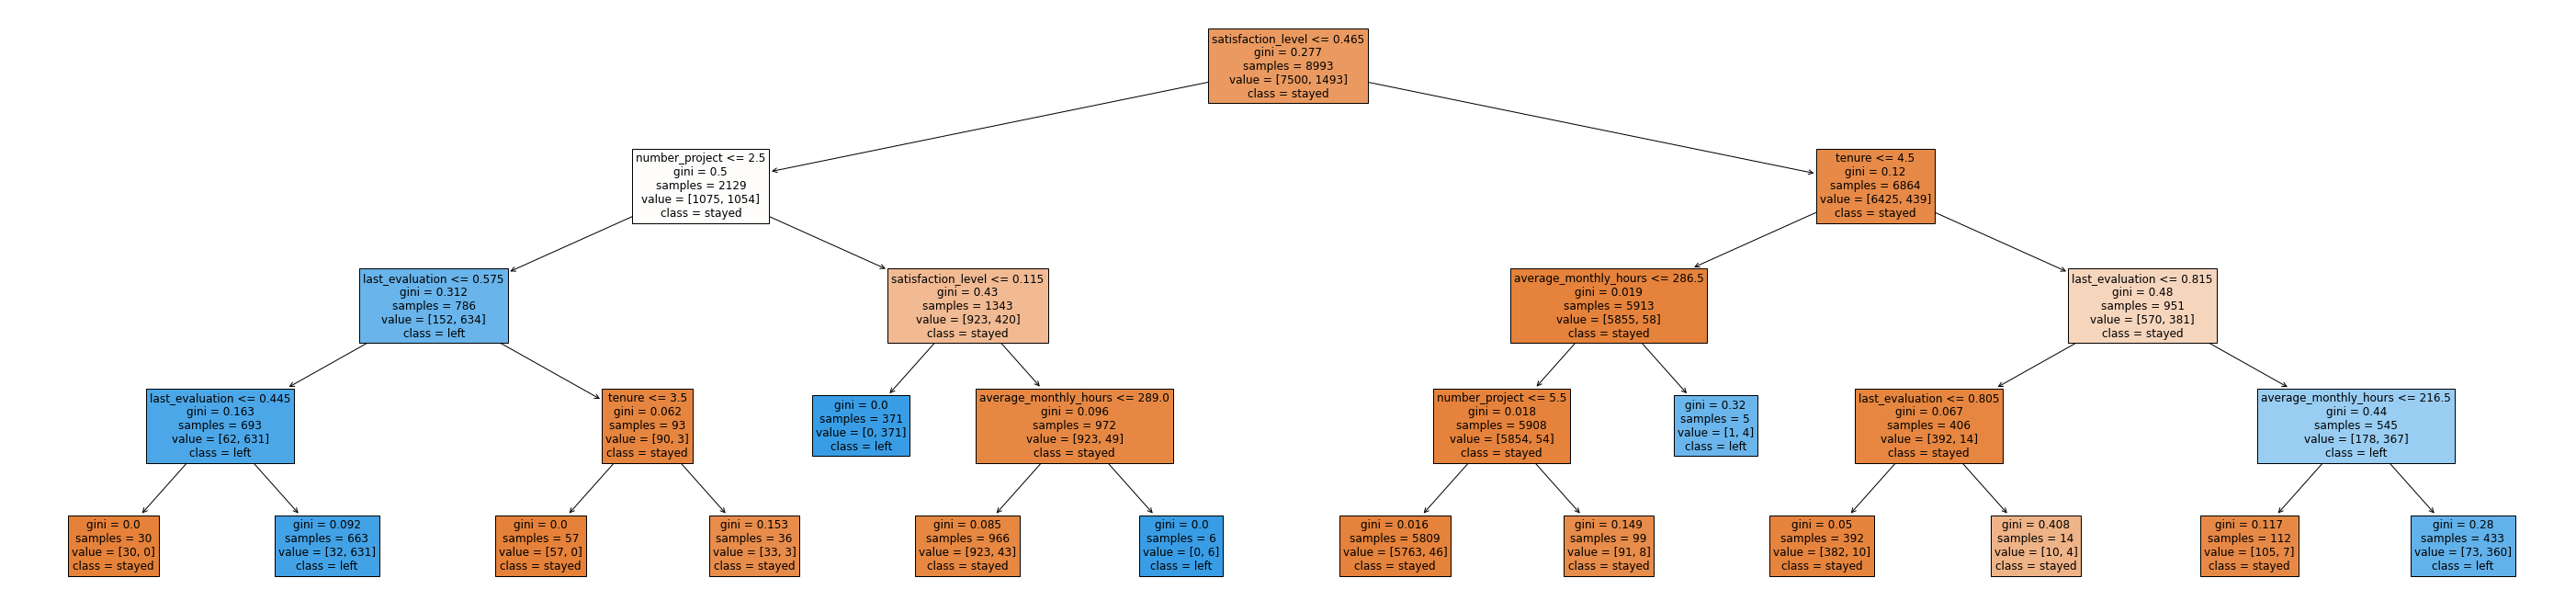

In [48]:
# Plot the tree
plt.figure(figsize=(50,12))
plot_tree(dt_clf.best_estimator_, max_depth=4, fontsize=12, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

We can observe that:
- The root node (top node) partitions groups by the variable `satisfaction_level`, which indicates the stongest predictive power of such variable.
- The first branch nodes use variables `number_project` and `tenure`, which indicates they are also strong predictors compared to the rest variables.
- Variables `work_accident`, `promotion_last_5years`, `salary`, `department` are not shown in the tree. This means that in the decision tree they are considered less significant in predicting whether an employee will leave.

We can show these findings by plotting the model importance:

In [49]:
# Create function to find `feature_importances_` for model
def model_importances(model_name:str, model, x):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model (object): the best estimator 
        x (Dataframe) : independent variables
        
    Plot a boxplot of feature importances.
    '''

    # Extract importance data as pandas Dataframe
    df_importances = pd.DataFrame(model.feature_importances_, 
                                    columns=['gini_importance'], index=x.columns)
    
    df_importances = df_importances.sort_values(by='gini_importance', ascending=False)

    
    # Creat a barplot to visualize the importances
    sns.barplot(data=df_importances, x="gini_importance", y=df_importances.index, orient='h')
    plt.title("{}: Feature Importances for Employee Leaving".format(model_name), fontsize=12)
    plt.ylabel("Feature")
    plt.xlabel("Importance")
    plt.show()

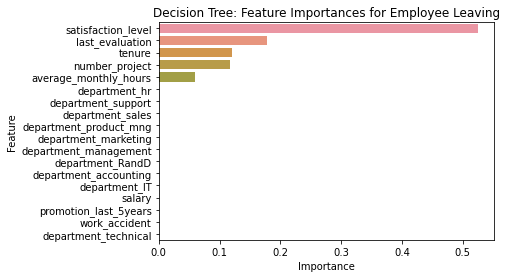

In [50]:
model_importances('Decision Tree', dt_clf.best_estimator_, X)

The resulting graph justifies that:
- `satisfaction_level` is the stongest predictor.
- `work_accident`, `promotion_last_5years`, `salary`, `department` are considered less significant.

On the other hand, previously we guessed `number_project` and `tenure` are also strong predictors compared to the rest variables. However, the graph shows a slightly different result: `last_evaluation` has more stronger importance than the two variables, although they are still strong predictors.

Additionally, `average_monthly_hours` has also some importance in the tree.

Finally, combine the result of decision tree with that of logistic regression

In [51]:
# Combine new scores with results
cv_results = pd.concat([results_lr, results_dt_cv]).drop_duplicates().reset_index(drop=True)

# Display results of new dataframe
cv_results

,Model,Precision,Recall,F1,Accuracy,AUC
0,Logistic Regression (train),0.461538,0.238129,0.314165,0.824836,0.590920
1,Logistic Regression (test),0.440860,0.261146,0.328000,0.819484,0.596967
2,Decision Tree CV (train),0.914552,0.916949,0.915707,0.971978,0.969819
3,Decision Tree CV (test),0.936214,0.913655,0.924797,0.975317,0.950627


We can clearly observe that all used metrics are higher in the decision tree model, indicating the decision tree model outperforms the logistic regression model.

#### B-2 Random Forest
Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. Hence, we will construct a random forest model next.

The training, testing datasets are the same as those in the decision tree.

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [52]:
# Instantiate model
random_forest = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf_clf = GridSearchCV(random_forest, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [53]:
%%time
rf_clf.fit(X_train, y_train)

CPU times: user 9min 37s, sys: 0 ns, total: 9min 37s
Wall time: 9min 37s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

Specify path to where you want to save your model.

In [54]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

Define functions to pickle the model and read in the model.

In [55]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [56]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Use the functions defined above to save the model in a pickle file and then read it in.

In [57]:
# Write pickle
write_pickle(path, rf_clf, 'hr_rf')

In [58]:
# Read pickle
rf_clf = read_pickle(path, 'hr_rf')

Identify the best AUC score achieved by the random forest model on the training set.

In [59]:
# Check best AUC score on CV
rf_clf.best_score_

0.9804250949807172

Identify the optimal values for the parameters of the random forest model.

In [60]:
# Check best params
rf_clf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Next, let's see one tree structure in the random forest ensembles:

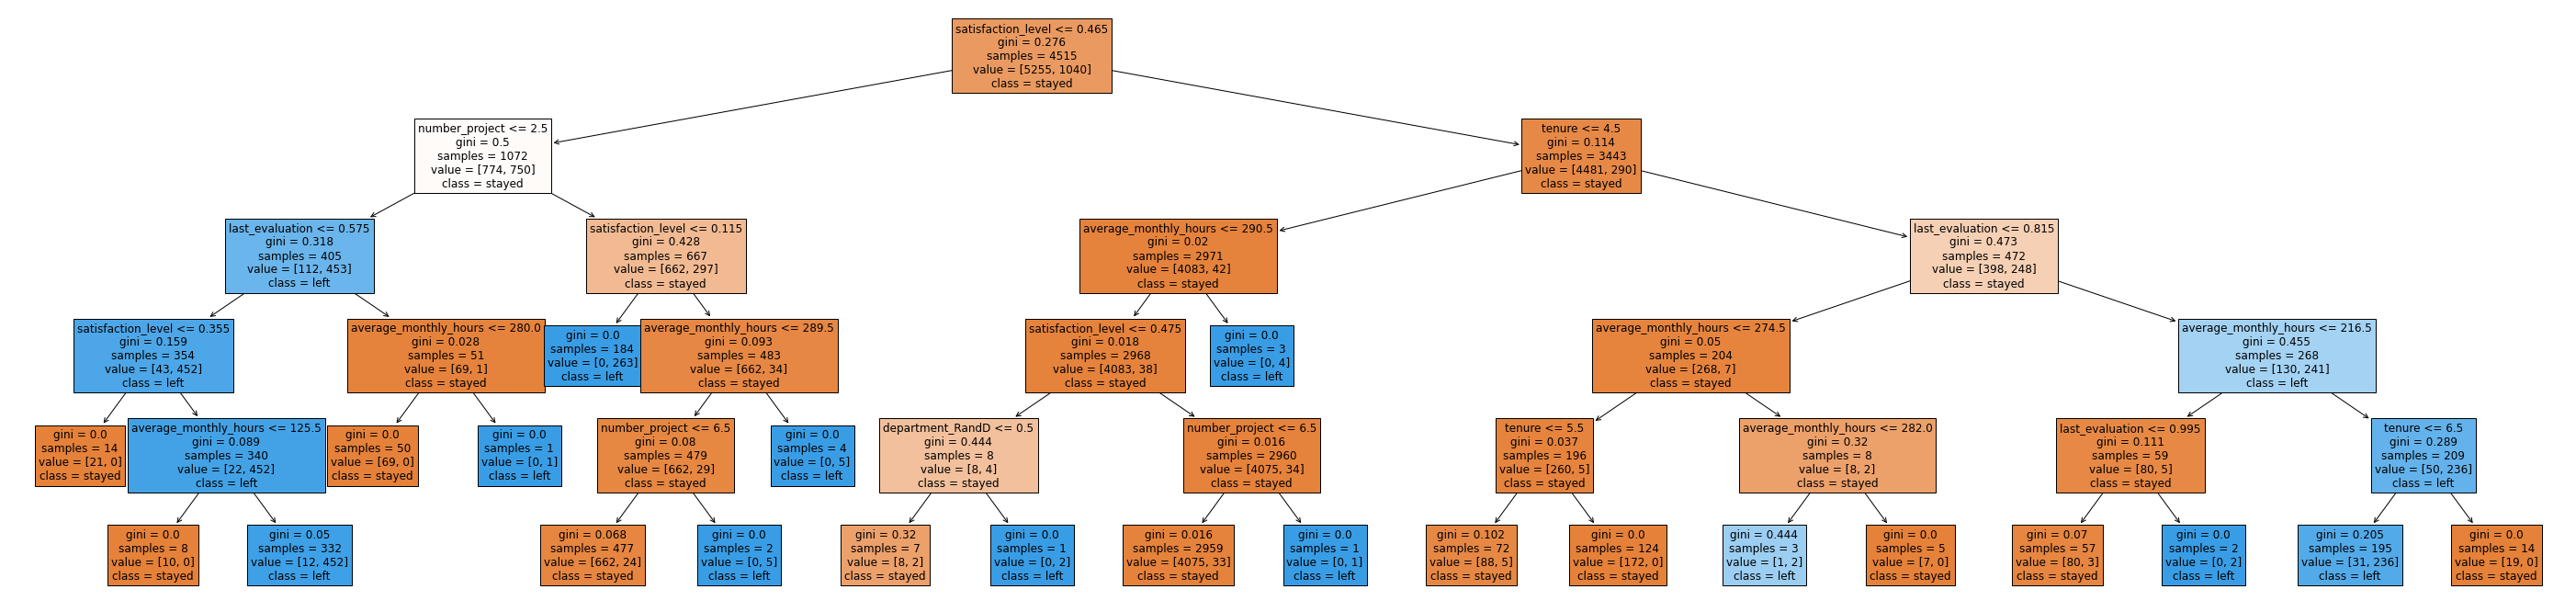

In [61]:
# Plot the tree
plt.figure(figsize=(50,12))
plot_tree(rf_clf.best_estimator_[0], max_depth=5, fontsize=12, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

We can observe the similar characteristics to the decision tree:

- Variable `satisfaction_level`, `number_project`, and `tenure`are strong predictors compared to the rest variables.
- Variables `work_accident`, `promotion_last_5years`, `salary`, and `department` are considered less significant in predicting whether an employee will leave.

Similarly, we can show these findings by plotting the model importance. However, instead of plotting for a single tree in the ensembles, it is better to plot for the overall forest to get the full picture.

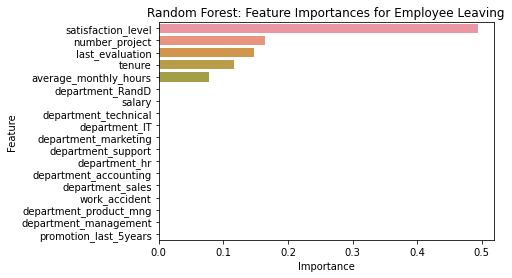

In [62]:
model_importances('Random Forest', rf_clf.best_estimator_, X)

The resulting graph justifies that:
- `satisfaction_level` is still the stongest predictor.
- `work_accident`, `promotion_last_5years`, `salary`, `department` are still considered less significant.

On the other hand, now the importance ranking of `number_project`, `tenure`, and `last_evaluation` differs: `number_project > last_evaluation > tenure`.

Similarly, `average_monthly_hours` has some importance in the tree.

Finally, let's collect the results of the random forest model and append to the previous combined results.

In [63]:
# Get all CV scores
results_rf_cv_train = make_results('Random Forest CV', rf_clf, 'auc')
results_rf_cv_test = get_scores('Random Forest CV', rf_clf, X_test, y_test)
results_rf_cv = pd.concat([results_rf_cv_train, results_rf_cv_test])
cv_results = pd.concat([cv_results, results_rf_cv]).drop_duplicates().reset_index(drop=True)
cv_results

,Model,Precision,Recall,F1,Accuracy,AUC
0,Logistic Regression (train),0.461538,0.238129,0.314165,0.824836,0.590920
1,Logistic Regression (test),0.440860,0.261146,0.328000,0.819484,0.596967
2,Decision Tree CV (train),0.914552,0.916949,0.915707,0.971978,0.969819
3,Decision Tree CV (test),0.936214,0.913655,0.924797,0.975317,0.950627
4,Random Forest CV (train),0.950023,0.915614,0.932467,0.977983,0.980425
5,Random Forest CV (test),0.964211,0.919679,0.941418,0.980987,0.956439


The random forest model also has similar performance on both training and testing datasets. The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

Last but not least, we visualize the result of the best performing model `Random Forest` with a confusion matrix.

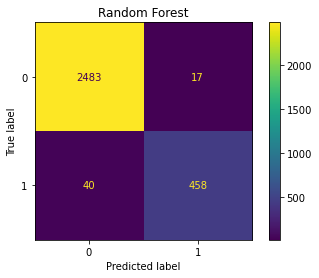

In [64]:
# Get predictions on testing data
y_pred_rf = rf_clf.best_estimator_.predict(X_test)

# Compute values for confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf, labels=rf_clf.classes_)

# Create display of confusion matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, 
                                  display_labels=rf_clf.classes_)

# Plot confusion matrix
rf_disp.plot(values_format='')

# Display plot
plt.title('Random Forest')
plt.show()

Compared to the confusion matrix of the logistic regression model, the random forest model predicts significantly fewer false positives and false negatives. Therefore, we can conclude that the random forest model is the most robust, predictive model among the three models.

### Model Outlook

Although the final model has high evaluation scores, there is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

Therefore, we can build improved models by further feature engineering, such as dropping `satisfaction_level`, or creating new feature with `average_monthly_hours` to indicate whether an employee is overworked.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Answers are in the following section __Conclusion, Recommendations, Next Steps__.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Let's review again the evaluation scores for all used models:

In [65]:
cv_results

,Model,Precision,Recall,F1,Accuracy,AUC
0,Logistic Regression (train),0.461538,0.238129,0.314165,0.824836,0.590920
1,Logistic Regression (test),0.440860,0.261146,0.328000,0.819484,0.596967
2,Decision Tree CV (train),0.914552,0.916949,0.915707,0.971978,0.969819
3,Decision Tree CV (test),0.936214,0.913655,0.924797,0.975317,0.950627
4,Random Forest CV (train),0.950023,0.915614,0.932467,0.977983,0.980425
5,Random Forest CV (test),0.964211,0.919679,0.941418,0.980987,0.956439


The based model is the random forest model with all metrics above 90%. The decision tree model also performs well in this project. On the contrary, the logistic regression model has relatively lower performance. High accuracy but low presicion and low recall means that the model has problems distinguishing false positives and false negatives.

Next, let's review again the top 10 feature importances in the random forest model:

In [74]:
# Create function to find `feature_importances_` for model
def model_top10_importances(model_name:str, model, x):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model (object): the best estimator 
        x (Dataframe) : independent variables
        
    Plot a boxplot of feature importances.
    '''
    # Get feature importances
    feat_impt = model.feature_importances_
    
    # Get indices of top 10 features
    ind = np.argpartition(model.feature_importances_, -10)[-10:]
    
    # Get column labels of top 10 features 
    feat = x.columns[ind]
    
    # Filter `feat_impt` to consist of top 10 feature importances
    feat_impt = feat_impt[ind]
    
    # Extract importance data as pandas Dataframe
    df_importances = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
    
    df_importances = df_importances.sort_values(by='Importance', ascending=False)

    
    # Creat a barplot to visualize the importances
    sns.barplot(data=df_importances, x="Importance", y='Feature', orient='h')
    plt.title("{}: Feature Importances for Employee Leaving".format(model_name), fontsize=12)
    plt.ylabel("Feature")
    plt.xlabel("Importance")
    plt.show()

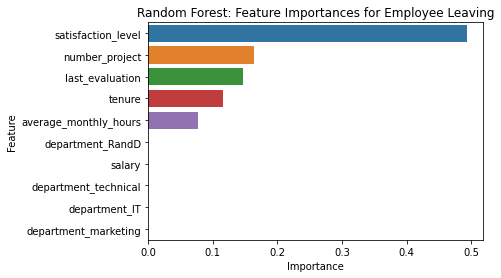

In [75]:
model_top10_importances('Random Forest', rf_clf.best_estimator_, X)
#rf_clf.best_estimator_.feature_importances_

It is clear that `satisfaction_level`, `number_project`, `last_evaluation`, `tenure` and `average_monthly_hours` are the most relevant variables.

### Conclusion, Recommendations, Next Steps

In the analyze stage, we observe that most employees at the company are overworked, which can lead to employee turnover. Then in the construct stage, our models also show that number of projects and average monthly working hours play an important role in predicting the employee turnover. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Either reward employees for working longer hours, or don't require them to do so. 
* Consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Conduct further investigation about why highly satisfied five- and six-year tenured employees leave.
* Conduct further investigation about why did some employees quit even with promotions in the last 5 years.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

As stated in the __Model Outlook__, to deal with data leakage, we can build improved models by further feature engineering, such as dropping `satisfaction_level`, or creating new feature with `average_monthly_hours` to indicate whether an employee is overworked. 

However, it may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

For another project, we could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.